# Парсинг телеграм каналов ключевых Российских банков

### Загрузка pyrogram и asyncio

In [8]:
import ast

import asyncio
from pyrogram import Client

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from env import api_id, api_hash, name_of_account

__Будем парсить каналы 10 ключевых российских банков__

In [56]:
banks_dict = {
    'Сбербанк': 'sberbank',
    'ВТБ Банк': 'bankvtb',
    'Газпромбанк': 'gazprombank',
    'Альфа Банк': 'AlfaBank',
    'ПСБ Банк': 'psbbank',
    'Московский Кредитный Банк (МКБ)': 'mkbbank',
    'Россельхозбанк (РСХБ)': 'rshb_tg',
    'Совкомбанк': 'sovcombankofficial',
    'Банк ДОМ.РФ': 'domrf_bank',
    'Тинькофф Банк': 'tbank'
}

__Создаем клиента__

In [57]:
import asyncio
from pyrogram import Client

async def main():
    '''Функция main() запускает Client pyrogram.
    Args:
        :None
    Returns:
        :None - если использование клиента возможно, Client отправляет сообщение "Greetings from Pyrogram" в чате "Избранное"
    Examples:
        >>>>await main()
    '''

    async with Client("my_account", api_id=api_id, api_hash=api_hash) as app:
         await app.send_message("me", "Greetings from **Pyrogram**!")

await main()

Создаем единую большую функцию для получения всех json данных о каждом посте, ранее определенной даты (`offset_date`) и позже преобразует все в df

In [75]:
app = Client("my_account", api_id=api_id, api_hash=api_hash  )

async def get_channel(channel, offset_date):
    date_format = '%Y-%m-%d %H:%M:%S'
    offset_date = datetime.strptime(offset_date, date_format)
    
    data = []
    async with app:
        async for message in app.get_chat_history(channel, limit=10, offset_date = offset_date):
            data.append(message)
    jsons = [loads(str(i )) for i in   data] 
    df = pd.concat([pd.json_normalize(i ) for i in jsons ] )
    return df
    



In [78]:
sber = await get_channel("sberbank", offset_date)


In [9]:
df = pd.read_excel("грязные данные все.xlsx")

In [ ]:
def preprocess(df):
    df['media_type'] = df['media'].str.split('.').str[1].str.lower()
    
    return df[['date', 'forwards', 'media']]

In [25]:
def parse_reactions(reaction_str):
    # Check if the value is NaN, return an empty dict if so
    if pd.isna(reaction_str):
        return {}
    
    # Convert the string to a list using ast.literal_eval
    reaction_list = ast.literal_eval(reaction_str)
    
   
        
    return reaction_list

In [26]:
df['reactions.reactions'].apply(parse_reactions)

0       [{'_': 'Reaction', 'emoji': '👍', 'count': 889}...
1       [{'_': 'Reaction', 'emoji': '❤', 'count': 443}...
2       [{'_': 'Reaction', 'emoji': '👍', 'count': 718}...
3       [{'_': 'Reaction', 'emoji': '🔥', 'count': 1094...
4       [{'_': 'Reaction', 'emoji': '❤', 'count': 636}...
                              ...                        
9763                                                   {}
9764                                                   {}
9765    [{'_': 'Reaction', 'emoji': '❤', 'count': 131}...
9766    [{'_': 'Reaction', 'emoji': '👍', 'count': 1137...
9767    [{'_': 'Reaction', 'emoji': '👍', 'count': 259}...
Name: reactions.reactions, Length: 9768, dtype: object

In [10]:
df['reactions.reactions'].iloc[0]

"[{'_': 'Reaction', 'emoji': '👍', 'count': 889}, {'_': 'Reaction', 'emoji': '🤔', 'count': 236}, {'_': 'Reaction', 'emoji': '❤', 'count': 169}, {'_': 'Reaction', 'emoji': '🔥', 'count': 74}, {'_': 'Reaction', 'emoji': '🎉', 'count': 33}]"

In [9]:
df['media'].str.split('.').str[1].str.lower()

0           NaN
1           NaN
2           NaN
3           NaN
4       sticker
         ...   
9763      video
9764      photo
9765      photo
9766      photo
9767      photo
Name: media, Length: 9768, dtype: object

In [5]:
for i in df.columns:
    print(i)

Unnamed: 0
_
id
date
mentioned
scheduled
from_scheduled
edit_date
has_protected_content
views
forwards
outgoing
sender_chat._
sender_chat.id
sender_chat.type
sender_chat.is_verified
sender_chat.is_restricted
sender_chat.is_creator
sender_chat.is_scam
sender_chat.is_fake
sender_chat.title
sender_chat.username
sender_chat.photo._
sender_chat.photo.small_file_id
sender_chat.photo.small_photo_unique_id
sender_chat.photo.big_file_id
sender_chat.photo.big_photo_unique_id
sender_chat.dc_id
sender_chat.has_protected_content
chat._
chat.id
chat.type
chat.is_verified
chat.is_restricted
chat.is_creator
chat.is_scam
chat.is_fake
chat.title
chat.username
chat.photo._
chat.photo.small_file_id
chat.photo.small_photo_unique_id
chat.photo.big_file_id
chat.photo.big_photo_unique_id
chat.dc_id
chat.has_protected_content
reactions._
reactions.reactions
media
sticker._
sticker.file_id
sticker.file_unique_id
sticker.file_name
sticker.mime_type
sticker.file_size
sticker.date
sticker.width
sticker.height
stic

In [15]:
df['bank'].value_counts()

bank
Сбербанк                           1000
ВТБ Банк                           1000
Газпромбанк                        1000
Альфа Банк                         1000
ПСБ Банк                           1000
Московский Кредитный Банк (МКБ)    1000
Россельхозбанк (РСХБ)              1000
Банк ДОМ.РФ                        1000
Тинькофф Банк                      1000
Совкомбанк                          768
Name: count, dtype: int64

In [86]:
s = full_df[full_df.date < '2024.30.01 23.59.59']

In [89]:
full_df[full_df.date < '2024.30.01']

,_,id,date,mentioned,scheduled,from_scheduled,edit_date,has_protected_content,views,forwards,...,via_bot.is_support,via_bot.is_premium,via_bot.first_name,via_bot.username,via_bot.dc_id,via_bot.photo._,via_bot.photo.small_file_id,via_bot.photo.small_photo_unique_id,via_bot.photo.big_file_id,via_bot.photo.big_photo_unique_id
0,Message,3476,2024-09-30 16:22:26,False,False,False,2024-09-30 18:51:31,False,247704.0,1937.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,3475,2024-09-30 14:00:14,False,False,False,2024-09-30 14:00:24,False,414165.0,1194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,3474,2024-09-30 11:53:28,False,False,False,2024-09-30 12:22:49,False,279088.0,1358.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,3473,2024-09-27 12:07:30,False,False,False,2024-09-27 12:07:40,False,360056.0,314.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,3472,2024-09-27 12:07:27,False,False,False,2024-09-27 12:07:47,False,334269.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Message,7166,2024-03-19 12:32:42,False,False,False,NaN,False,100981.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,7165,2024-03-19 12:32:42,False,False,False,NaN,False,91048.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,7164,2024-03-19 12:32:42,False,False,False,2024-03-19 12:32:51,False,81362.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,7163,2024-03-18 19:03:57,False,False,False,2024-03-19 22:19:59,False,92044.0,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
s['date'].sort_values()

0    2022-03-11 14:54:25
0    2022-03-11 18:02:43
0    2022-03-12 11:02:18
0    2022-03-14 12:10:56
0    2022-03-15 16:30:24
            ...         
0    2024-09-30 17:38:36
0    2024-09-30 17:38:36
0    2024-09-30 17:38:36
0    2024-09-30 19:02:03
0    2024-09-30 19:03:32
Name: date, Length: 9768, dtype: object

In [80]:
full_df.sort_values('date')

,_,id,date,mentioned,scheduled,from_scheduled,edit_date,has_protected_content,views,forwards,...,via_bot.is_support,via_bot.is_premium,via_bot.first_name,via_bot.username,via_bot.dc_id,via_bot.photo._,via_bot.photo.small_file_id,via_bot.photo.small_photo_unique_id,via_bot.photo.big_file_id,via_bot.photo.big_photo_unique_id
0,Message,1,2022-03-11 14:54:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,3,2022-03-11 18:02:43,False,False,False,2022-03-12 10:34:58,False,11520.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,4,2022-03-12 11:02:18,False,False,False,2022-03-13 08:33:03,False,11801.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,5,2022-03-14 12:10:56,False,False,False,2022-03-14 12:29:51,False,9276.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,7,2022-03-15 16:30:24,False,False,False,2022-03-15 16:30:49,False,8654.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Message,2318,2024-09-30 17:38:36,False,False,False,NaN,False,806349.0,318.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,2322,2024-09-30 17:38:36,False,False,False,2024-10-01 11:13:18,False,834117.0,291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,2317,2024-09-30 17:38:36,False,False,False,NaN,False,823888.0,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,8200,2024-09-30 19:02:03,False,False,False,2024-09-30 19:02:11,False,48721.0,260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
full_df.to_excel("грязные данные все.xlsx")

In [10]:
10 * 90

900

In [6]:
type(df['date'].iloc[0] )

str

In [7]:
df.tail()

,_,id,date,mentioned,scheduled,from_scheduled,edit_date,has_protected_content,views,forwards,...,forward_from_chat.is_fake,forward_from_chat.title,forward_from_chat.username,forward_from_chat.photo._,forward_from_chat.photo.small_file_id,forward_from_chat.photo.small_photo_unique_id,forward_from_chat.photo.big_file_id,forward_from_chat.photo.big_photo_unique_id,forward_from_chat.dc_id,forward_from_chat.has_protected_content
0,Message,2429,2023-04-12 12:30:16,False,False,False,2023-04-12 14:03:16,False,368624,641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,2428,2023-04-11 16:48:52,False,False,False,NaN,False,158800,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,2427,2023-04-11 16:48:51,False,False,False,NaN,False,158430,299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,2426,2023-04-11 16:48:51,False,False,False,NaN,False,160388,381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Message,2425,2023-04-11 16:48:51,False,False,False,NaN,False,149948,297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df[[ 'media','text', 'caption', 'media_group_id' ]].head(10)

,media,text,caption,media_group_id
0,MessageMediaType.PHOTO,NaN,NaN,1.378549e+16
0,NaN,NaN,NaN,1.378549e+16
0,NaN,NaN,NaN,NaN
0,MessageMediaType.VIDEO_NOTE,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN
0,MessageMediaType.PHOTO,NaN,NaN,1.378480e+16
0,MessageMediaType.PHOTO,NaN,Делимся нашей отчётностью по МСФО* за прошедши...,1.378480e+16
0,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN


In [60]:
df.shape[0]

1000

In [29]:
df[['date', 'media','text', 'caption', 'views','forwards',  'reactions.reactions']]

,date,media,text,caption,views,forwards,reactions.reactions
0,2024-08-09 09:55:52,MessageMediaType.PHOTO,NaN,NaN,390947,347,NaN
0,2024-08-09 09:55:52,NaN,NaN,NaN,426218,350,"[{'_': 'Reaction', 'emoji': '👍', 'count': 710}..."
0,2024-08-08 17:05:04,NaN,NaN,NaN,258299,96,"[{'_': 'Reaction', 'emoji': '👍', 'count': 594}..."
0,2024-08-08 17:05:04,MessageMediaType.VIDEO_NOTE,NaN,NaN,241942,113,"[{'_': 'Reaction', 'emoji': '❤', 'count': 240}..."
0,2024-08-08 13:41:52,NaN,NaN,NaN,272531,951,"[{'_': 'Reaction', 'emoji': '❤', 'count': 1425..."
0,2024-08-08 09:56:03,MessageMediaType.PHOTO,NaN,NaN,331999,591,NaN
0,2024-08-08 09:56:03,MessageMediaType.PHOTO,NaN,Делимся нашей отчётностью по МСФО* за прошедши...,368390,606,"[{'_': 'Reaction', 'emoji': '👍', 'count': 636}..."
0,2024-08-06 19:00:06,NaN,NaN,NaN,224028,515,"[{'_': 'Reaction', 'emoji': '👍', 'count': 759}..."
0,2024-08-05 17:29:28,NaN,NaN,NaN,246799,533,"[{'_': 'Reaction', 'emoji': '❤', 'count': 490}..."
0,2024-08-02 15:02:26,NaN,NaN,NaN,265561,34,"[{'_': 'Reaction', 'emoji': '👍', 'count': 532}..."


In [27]:
df.shape

(50, 98)

In [ ]:
def df_preprocess(df):
    

ValueError: cannot reindex on an axis with duplicate labels

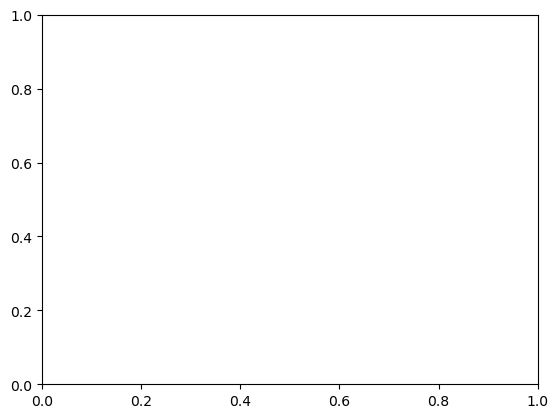

In [64]:
sns.countplot(data = df, x = 'media', ) 

In [68]:
df.groupby('media', as_index = False)['forwards'].mean().sort_values('forwards', ascending = False)

,media,forwards
5,MessageMediaType.VIDEO,864.536000
2,MessageMediaType.PHOTO,666.886128
0,MessageMediaType.ANIMATION,519.166667
4,MessageMediaType.STICKER,432.764706
7,MessageMediaType.WEB_PAGE,232.875000
6,MessageMediaType.VIDEO_NOTE,200.708333
1,MessageMediaType.AUDIO,136.000000
3,MessageMediaType.POLL,63.555556


In [69]:
df[['forwards', 'views']].corr()

,forwards,views
forwards,1.000000,0.327524
views,0.327524,1.000000
